In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# Normalize pixel values (0-255 -> 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
# 3. Design CNN model
model = models.Sequential()

In [7]:
# Convolution + Pooling layers
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Flatten + Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes

In [9]:
# 4. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# 5. Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3151 - loss: 1.8436 - val_accuracy: 0.5143 - val_loss: 1.3387
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5207 - loss: 1.3286 - val_accuracy: 0.5679 - val_loss: 1.2064
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5813 - loss: 1.1654 - val_accuracy: 0.6146 - val_loss: 1.0938
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6324 - loss: 1.0459 - val_accuracy: 0.6382 - val_loss: 1.0323
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6646 - loss: 0.9649 - val_accuracy: 0.6601 - val_loss: 0.9888
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6886 - loss: 0.8883 - val_accuracy: 0.6705 - val_loss: 0.9402
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7044 - loss: 0.8396 - val_accuracy: 0.6882 - val_loss: 0.9029
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7172 - loss: 0.8114 - val_accuracy: 0

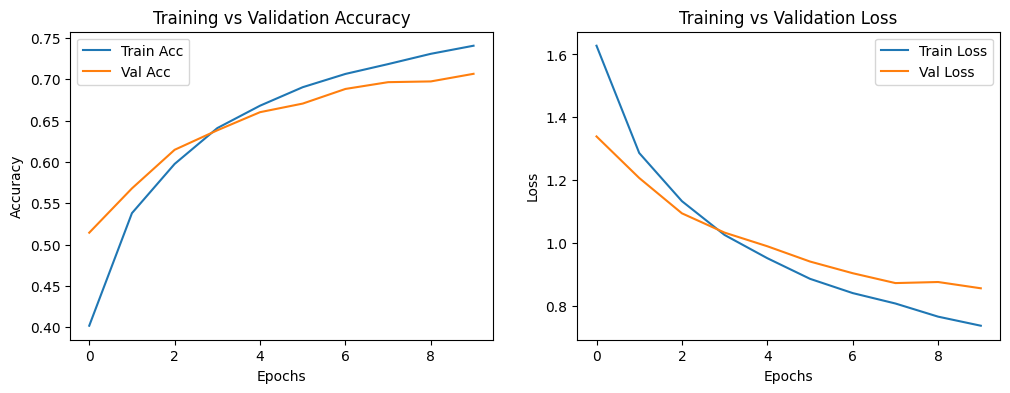

In [11]:
# 6. Plot Training and Validation Accuracy/Loss
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()

In [12]:
# 7. Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

313/313 - 2s - 5ms/step - accuracy: 0.7065 - loss: 0.8549

Test Accuracy: 70.65%


In [13]:
num_images = 5
test_images = x_test[:num_images]
test_labels = y_test[:num_images]

In [14]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [15]:
# Predict
predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


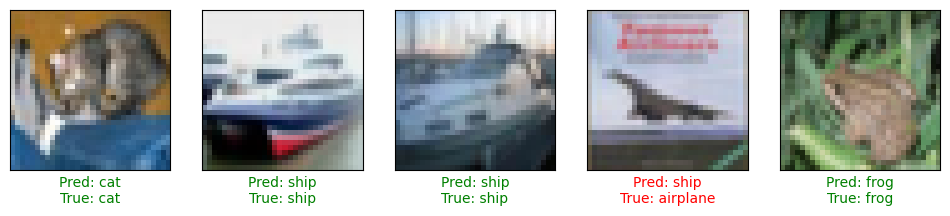

In [16]:
# Plot results
plt.figure(figsize=(12,6))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])   # show input image

    # Get predicted class
    pred_class = np.argmax(predictions[i])
    true_class = np.argmax(test_labels[i])

    # Label color: green = correct, red = wrong
    color = 'green' if pred_class == true_class else 'red'
    plt.xlabel(f"Pred: {class_names[pred_class]}\nTrue: {class_names[true_class]}", color=color)

plt.show()

In [54]:
from tensorflow.keras.preprocessing import image
from google.colab import files
# 8. Upload custom image and predict
print("\n Upload an image for prediction:")
uploaded = files.upload()


 Upload an image for prediction:


Saving Ship.jpg to Ship (3).jpg


In [55]:
# Load and preprocess image
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(32, 32))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [56]:
# Prediction
pred = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [57]:
# CIFAR-10 class names
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

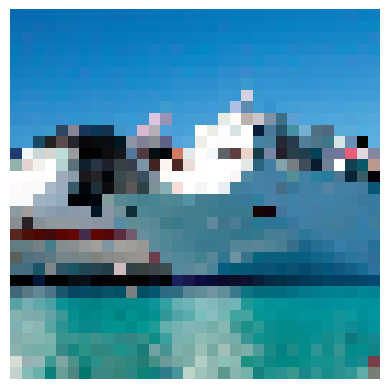

In [58]:
# Show image + prediction
plt.imshow(img)
plt.axis("off")
plt.show()

In [59]:
print("🔮 Predicted class:", classes[np.argmax(pred)])

🔮 Predicted class: ship
